In [ ]:
Importo librerias necesarias

In [1]:
import json
import pandas as pd
import tensorflow as tf

Leo el archivo que con el set de datos limpios

In [2]:
df = pd.read_json("2_cars_to_model_proces.json", orient="columns")
df.tail()
#elimino columna sin valores o con problemas
df.pop('TIER 2 B7')

0       0
1       0
10      0
100     0
1000    0
1001    0
1002    0
1003    0
1004    0
1005    0
1006    0
1007    0
1008    0
1009    0
101     0
1010    0
1011    0
1012    0
1013    0
1014    0
1015    0
1016    0
1017    0
1018    0
1019    0
102     0
1020    0
1021    0
1022    0
1023    0
       ..
972     0
973     0
974     0
975     0
976     0
977     0
978     0
979     0
98      0
980     0
981     0
982     0
983     0
984     0
985     0
986     0
987     0
988     0
989     0
99      0
990     0
991     0
992     0
993     0
994     0
995     0
996     0
997     0
998     0
999     0
Name: TIER 2 B7, Length: 2850, dtype: int64

Reservamos un 80% de los datos para entrenamiento

In [3]:
train_dataset = df.sample(frac=0.8,random_state=0) 

El resto de los datos son para test o sea un 20%

In [4]:
test_dataset = df.drop(train_dataset.index)

Elimino del set de datos la columna que queremos predecir y lo dejamos almacenadas en 2 variables de train y test
,para su posterior uso en las evaluciones 

In [5]:
train_labels = train_dataset.pop('rendimientoMixto')
test_labels = test_dataset.pop('rendimientoMixto')

#Normalizamos los datos de entrada.
Vemos como estan las medianas y desviaciones de los datos

In [6]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats 

,count,mean,std,min,25%,50%,75%,max
cilindrada,2280.0,2.294298,1.127685,0.8,1.5,2.0,3.0,6.6
co2,2280.0,191.759211,49.790764,97.0,157.0,179.0,217.0,399.0
rendimientoCarretera,2280.0,16.046711,3.367930,8.2,13.8,16.0,18.3,27.0
rendimientoUrbano,2280.0,9.922018,2.630664,3.8,8.0,10.0,11.5,19.8
EURO V,2280.0,0.689474,0.462811,0.0,0.0,1.0,1.0,1.0
EURO VI,2280.0,0.245614,0.430545,0.0,0.0,0.0,0.0,1.0
TIER 3 B50,2280.0,0.000877,0.029611,0.0,0.0,0.0,0.0,1.0
TIER 2 B5,2280.0,0.026754,0.161400,0.0,0.0,0.0,0.0,1.0
TIER 2 B4,2280.0,0.014474,0.119459,0.0,0.0,0.0,0.0,1.0
TIER 3 B70,2280.0,0.016667,0.128047,0.0,0.0,0.0,0.0,1.0


Normalizamos , creamos la funcion norm, esta funcion reescala a un rango [0,1](normaliza),
y centra las columnas  con respecto a una media 0 con desviacion estandar 1(estandarizacion),
de forma que las columnas de características tengan los mismos parámetros que una distribución normal

In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

Normalizamos el set de entrenamiento

In [8]:
normed_train_data = norm(train_dataset) 

Normalizamos el set de de test para inferir luego

In [9]:
normed_test_data = norm(test_dataset) 

Verificacion de normalizacion y estandarizacion


In [10]:
normed_train_stats = normed_train_data.describe().transpose()
normed_train_stats 

,count,mean,std,min,25%,50%,75%,max
cilindrada,2280.0,2.630644e-15,1.0,-1.325102,-0.704362,-0.260975,0.625797,3.818176
co2,2280.0,-1.477619e-16,1.0,-1.903148,-0.698106,-0.256257,0.506937,4.162234
rendimientoCarretera,2280.0,-1.130015e-14,1.0,-2.329832,-0.667089,-0.013869,0.669043,3.252232
rendimientoUrbano,2280.0,2.003064e-15,1.0,-2.327176,-0.730621,0.029644,0.599842,3.754939
EURO V,2280.0,3.038505e-17,1.0,-1.489753,-1.489753,0.670958,0.670958,0.670958
EURO VI,2280.0,8.881784e-17,1.0,-0.570472,-0.570472,-0.570472,-0.570472,1.752165
TIER 3 B50,2280.0,4.849983e-16,1.0,-0.029624,-0.029624,-0.029624,-0.029624,33.741672
TIER 2 B5,2280.0,5.882234e-17,1.0,-0.165764,-0.165764,-0.165764,-0.165764,6.030016
TIER 2 B4,2280.0,6.022473e-16,1.0,-0.121160,-0.121160,-0.121160,-0.121160,8.249912
TIER 3 B70,2280.0,1.606658e-16,1.0,-0.130160,-0.130160,-0.130160,-0.130160,7.679461


#DEFINIMOS EL MODELO------
Esperamos solo un valor continuo, sin funcion de activacion o sea una capa final dense(1).
Definimos 2 capas inciales densamente conectadas de 64 neuronas. Con la primera capa de tamano de entrada igual al set de entrenamiento.

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu',input_shape=[len(train_dataset.keys())]))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  return model

Creamos el modelo

In [12]:
model=build_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________


#Configuracion del modelo

In [14]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [15]:
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [16]:
EPOCHS = 1000

history = model.fit(
            normed_train_data, train_labels,
            epochs=EPOCHS, validation_split = 0.2, verbose=1) 

Train on 1824 samples, validate on 456 samples
Epoch 1/1000
1824/1824 [==============================] - 1s 385us/sample - loss: 79.2889 - mae: 8.0954 - mse: 79.2889 - val_loss: 18.0284 - val_mae: 3.5412 - val_mse: 18.0284
Epoch 2/1000
1824/1824 [==============================] - 0s 49us/sample - loss: 9.3824 - mae: 1.8334 - mse: 9.3824 - val_loss: 2.8994 - val_mae: 1.0697 - val_mse: 2.8994
Epoch 3/1000
1824/1824 [==============================] - 0s 52us/sample - loss: 3.4190 - mae: 0.7971 - mse: 3.4190 - val_loss: 0.6290 - val_mae: 0.5346 - val_mse: 0.6290
Epoch 4/1000
1824/1824 [==============================] - 0s 52us/sample - loss: 1.3705 - mae: 0.5126 - mse: 1.3705 - val_loss: 0.3983 - val_mae: 0.4008 - val_mse: 0.3983
Epoch 5/1000
1824/1824 [==============================] - 0s 48us/sample - loss: 0.6812 - mae: 0.3785 - mse: 0.6812 - val_loss: 0.3861 - val_mae: 0.3612 - val_mse: 0.3861
Epoch 6/1000
1824/1824 [==============================] - 0s 47us/sample - loss: 0.4085 - mae

Vemos del historial las estadicticas almacenadas

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail() 

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.018415,0.098816,0.018415,0.338969,0.190814,0.338969,995
996,0.016196,0.093420,0.016196,0.375808,0.154566,0.375808,996
997,0.017847,0.097631,0.017847,0.351645,0.182402,0.351645,997
998,0.016935,0.100550,0.016935,0.388449,0.191620,0.388449,998
999,0.017139,0.096240,0.017139,0.366425,0.147034,0.366425,999


In [ ]:
Graficamos la evolucion de los  datos de error tanto de los valores de entrenamiento como los de validacion

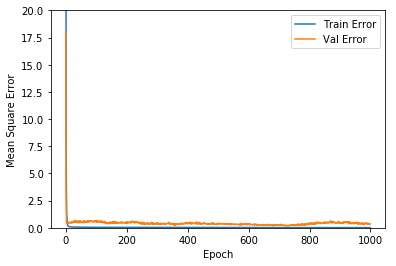

In [92]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)
 

Evaluamos el error absoluto medio, que es mas humanamente comprensible, este nos retorna un error muy bajo.
El cual indica que el modelo es bueno.

In [19]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:.2f} KM".format(mae))
print("Testing set Mean Sqr Error: {:.2f} KM".format(mse))
 

570/570 [==============================] - 0s 31us/sample - loss: 0.0525 - mae: 0.1136 - mse: 0.0525
Testing set Mean Abs Error: 0.05 KM
Testing set Mean Sqr Error: 0.11 KM


Guardamos el modelo obtenido en un archivo H5

In [20]:
# Guardar el Modelo
model.save('cars_model.h5')

Levantamos el archivo de entrenamiento, este sera el transportable al destino final en produccion

In [89]:

# Recrea exactamente el mismo modelo solo desde el archivo
loaded_model = tf.keras.models.load_model('cars_model.h5')


Predecimos el primer valor del set de datos normalizado , y comparamos con el valor real almacenado en test_labels

In [91]:
Xnew = loaded_model.predict(normed_test_data)
print("Predicted=%s , Real=%s" % (Xnew[0],test_labels[0]))

Predicted=[16.71425] , Real=16.7
